# Simulation et Monte Carlo - Projet final
Marches aléatoires autosécantes
## 1 - Simulation de trajectoires en dimension 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def dimension_2_random_walk(X):
    U = np.random.choice([1,2,3,4])
    if U == 1:
        X[0] += 1
    elif U == 2:
        X[0] -= 1
    elif U == 3:
        X[1] += 1
    else:
        X[1] -= 1

In [ ]:
n = 10000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:    
    dimension_2_random_walk(X)

    if tuple(X) in trajectoire:
        longueurs.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire.append(tuple(X))

In [ ]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2 = sns.distplot(np.array(longueurs)[np.where(np.array(longueurs)>0)], kde=False)
plt.show()

## 2 - Modification de la simulation en dimension d

In [1]:
import numpy as np
import copy

def random_walk_n_dimensions(d,k,nbriter):
    ''' Retourne une liste de d'arrays d'arrays. Chaque élément de la grosse liste est une trajectoire simulée par la méthode de la question 2 '''
    N = 2*d*k # Nombre de trajectoires

    trajectoires = [] # Liste des trajectoires

    trajectoires.append([]) # On initialise la liste
    trajectoires[0].append(np.zeros(d)) # On initialise la 1e trajectoire avec l'état de départ (que des 0)
    trajectoires *= N # On réplique cet élément pour avoir les N trajectoires initialisées dans la grande liste.

    for z in range(nbriter): # Les marches aléatoires auront une longueur nbriter. On se positionne à chaque étape.


        # Selon la méthode de la question 2, nous allons d'abord créer les directions avant de les attribuer.

        directions_positives = [] # On crée toutes les directions positives
        for i in range(d): # Pour chaque dimension
            directions_positives.append(np.zeros(d)) # On ajoute la direction où on se déplace de +1 dans la direction i
            directions_positives[i][i] = 1

        directions_positives *= k # Comme on tire k fois chaque direction possible, on réplique k fois la liste des directions.

        directions_negatives = [] # On fait la même chose avec les directions négatives
        for i in range(d):
            directions_negatives.append(np.zeros(d))
            directions_negatives[i][i] = -1

        directions_negatives *= k

        directions = list(np.random.permutation(np.array(directions_positives + directions_negatives))) # On concatène toutes les directions et on mélange.

        for i in range(N): # Enfin, à chaque direction i, on additionne la direction pour se faire déplacer l'état.
            copie = copy.deepcopy(trajectoires[i]) # On utilise copy.deepcopy pour éviter les problèmes de doublons sur les autres trajectoires.
            copie.append(copie[-1]+directions[i])
            trajectoires[i] = copie
    
    for j in range(N):
        trajectoires[j] = np.array(trajectoires[j]) # On convertit toutes les trajectoires en arrays, c'est plus facile à plotter.

    return trajectoires

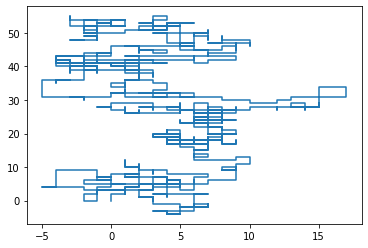

In [3]:
rwalk = random_walk_n_dimensions(2,2,1000)

import matplotlib.pyplot as plt

fig0, ax0 = plt.subplots()

ax0.plot(rwalk[0][:,1],rwalk[0][:,0])

plt.show()

In [2]:
def autosections(d,k,nbriter):
    rwalk2 = random_walk_n_dimensions(1,2,1000)
    resultat = []
    for i in range(2*1*2):
        longueurs = []
        longueur = 0
        for index, elt in enumerate(rwalk2[i][1:,:]):
            if elt in rwalk2[i][:index,:]:
                longueurs.append(longueur) # On enregistre la longueur parcourue
                longueur = 0 # On réinitialise la longueur
            else:
                longueur += 1
        resultat.append(longueurs)
        longueurs = 0
    return resultat


In [3]:
autosections(2,2,20)

[[1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  2,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
